In [1]:
import numpy as np
import PIL.Image
import os
import shutil
import zipfile
import re
import cv2
import difflib
import glob
import matplotlib.pyplot as plt
from matplotlib import cm
from subprocess import call
%matplotlib inline
#green_purple = brewer2mpl.get_map('Paired', 'Qualitative', 11).mpl_colormap

/home/steve/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dataset_labels = dict([('background', 0),
                    ('books', 1),
                    ('cabinets', 2),
                    ('ceiling', 3),
                    ('chair', 4),
                    ('computer', 5),
                    ('cup', 6),
                    ('bottle', 6),
                    ('door', 7),
                    ('fire_extinguisher', 8),
                    ('floor', 9),
                    ('fridge', 10),
                    ('keyboard', 11),
                    ('monitor', 12),
                    ('person', 13),
                    ('poster', 14),
                    ('signs', 15),
                    ('table', 16),
                    ('trashcan', 17),
                    ('walls', 18),
                    ('whiteboard', 19)])

B_labels = [0,170,219,219,147,69,65,69,137,113,170,169,0,65,255,185,137,209,113,0]
G_labels = [0,70,132,132,169,114,152,114,165,88,70,155,255,152,255,205,165,147,88,0]
R_labels = [0,67,61,61,207,167,175,167,78,143,67,189,0,175,0,150,78,146,143,255]

In [3]:
length = 66
os.chdir('annotations/')
with open('../test_files.txt') as f:
    for line in f:
        fields = line.split(',')
        filename = os.path.splitext(fields[0])[0]+'.zip'
        start = int(fields[1])
        print start
        video = fields[2][1:]
        #print(filename + ' - ' + start + ' - ' + video)
        with zipfile.ZipFile(filename, "r") as z:
            z.extractall("./")
        #os.chdir('rendered')
        #Get color dictionary
        colors = dict()
        with open('rendered/colors.json') as c:
            for line2 in c:
                fields = line2.split(',')
                try:
                    name = difflib.get_close_matches(fields[0], dataset_labels.keys())[0]
                except:
                    print 'Could not match: ' + fields[0]
                tmp = int(fields[1]) * 255 * 255 + int(fields[2]) * 255 + int(fields[3])
                #print(name + ": " + str(tmp))
                colors[tmp] = dataset_labels[name]
        print colors
        with open('map.txt', 'w') as cf:
            cf.writelines('{}:{}\n'.format(k,v) for k, v in colors.items())
        #Convert colored images
        #os.chdir('../')
        #imageFiles = sorted(glob.glob('rendered/*.png'), key = lambda x: x.rsplit('.', 1)[0])
        #Too slow to do in python, writing C++ to do this
        
        numImages = len(glob.glob('rendered/*.png'))
        call(["../change_labels/bin/Change_Labels", str(start), video, str(numImages)])
        #Cleanup
        shutil.rmtree('rendered')

os.chdir('../')     

22
{65025: 18, 12082050: 11, 13926531: 17, 3481062: 10, 11072167: 3, 7370408: 4, 11028939: 13, 5470066: 1, 6918958: 15, 13627856: 16, 3989905: 8, 8950578: 19, 14274196: 7, 15445366: 14, 4265560: 5, 9601977: 12, 4515962: 9, 13354466: 6, 16539837: 2}
44
{65025: 9, 12082050: 3, 11558627: 19, 11072167: 1, 7370408: 4, 13627856: 16, 8950578: 18, 14274196: 7, 4265560: 5, 9601977: 8, 4515962: 2, 14747707: 12, 7965852: 6, 2549274: 17, 11699060: 11, 11771359: 14}
66
{65025: 9, 12082050: 4, 7694841: 14, 11770534: 12, 11072167: 18, 7370408: 19, 11347399: 5, 63500: 15, 756429: 16, 6629729: 10, 13627856: 17, 8950578: 8, 14274196: 7, 9975929: 6, 4265560: 2, 9601977: 1, 4515962: 3, 8274655: 11}
88
{16417585: 19, 65025: 1, 12082050: 10, 14689030: 15, 11072167: 3, 7370408: 5, 2730260: 16, 11028939: 11, 13168332: 14, 3882670: 17, 13627856: 9, 850136: 12, 8950578: 4, 14274196: 7, 4265560: 6, 9601977: 8, 4515962: 2, 13746714: 18}
110
{65025: 19, 12082050: 14, 11072167: 3, 7370408: 16, 11028939: 4, 1776111:

ValueError: invalid literal for int() with base 10: '0chair'

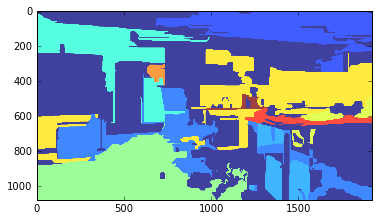

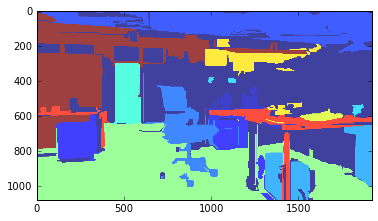

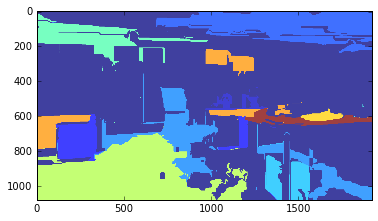

[ 0  1  2  3  4  5  6  7  9 11 12 16]


In [7]:
img1 = cv2.imread('annotations/vid3/4306_1.png', 0)
f1 = plt.imshow(img1, cmap=cm.jet,alpha=0.75)
plt.show()
img2 = cv2.imread('annotations/vid3/4306_2.png', 0)
f2 = plt.imshow(img2, cmap=cm.jet,alpha=0.75)
plt.show()
img = cv2.imread('annotations/vid3/4306.png', 0)
f3 = plt.imshow(img, cmap=cm.jet,alpha=0.75)
plt.show()
print(np.unique(img))

In [ ]:
count = 0
        for imgF in imageFiles:
            #read each image
            img = cv2.imread(imgF)
            m = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
            itI = np.nditer(img, flags=['f_index'])
            itM = np.nditer(m, flags=['f_index'], op_flags=['writeonly'])
            i = 1
            num1 = num2 = 0
            while not itI.finished:
                #every 3rd for rgb
                if i % 3 == 0:
                    val = num1 * 255 * 255 + num2 * 255 + int(itI[0])
                    if val in colors:
                        itM[0] = colors[val]
                    else:
                        itM[0] = 0
                    itM.iternext()
                elif i % 3 == 1:
                    num1 = int(itI[0])
                else:
                    num2 = int(itI[0])
                itI.iternext()
                i = i + 1
            #Need to figure out which frame this is
            frame_num = start * 30 + count
            ann_num = 2
            if start % 3 == 0:
                ann_num = 0
            elif (start + 22) % 3 == 0:
                ann_num = 1
            outFile = video + '/' + str(frame_num) + '_' + str(ann_num) + '.png'
            print outFile
            count = count + 1
            cv2.imwrite(outFile,m)

In [ ]:
with open('map.txt', 'w') as cf:
    cf.writelines('{}:{}\n'.format(k,v) for k, v in dataset_labels.items())